In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# global_power_plant_database.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
global_power_plant_raw_df = pd.read_csv('global_power_plant_database.csv', delimiter=',', nrows = nRowsRead)
global_power_plant_raw_df.dataframeName = 'global_power_plant_database.csv'
nRow, nCol = global_power_plant_raw_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 22 columns


In [14]:
global_power_plant_raw_df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN


In [15]:
global_power_plant_raw_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'fuel1', 'fuel2', 'fuel3', 'fuel4',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016',
       'estimated_generation_gwh'],
      dtype='object')

In [16]:
#Data Preparation & Cleaning
global_power_plant_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   1000 non-null   object 
 1   country_long              1000 non-null   object 
 2   name                      1000 non-null   object 
 3   gppd_idnr                 1000 non-null   object 
 4   capacity_mw               1000 non-null   float64
 5   latitude                  1000 non-null   float64
 6   longitude                 1000 non-null   float64
 7   fuel1                     1000 non-null   object 
 8   fuel2                     36 non-null     object 
 9   fuel3                     3 non-null      object 
 10  fuel4                     0 non-null      float64
 11  commissioning_year        285 non-null    float64
 12  owner                     697 non-null    object 
 13  source                    1000 non-null   object 
 14  url      

In [21]:
selected_column = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'fuel1',
    'fuel2',
    'fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'estimated_generation_gwh'
]

In [22]:
len(selected_column)

14

In [23]:
global_power_plant_df = global_power_plant_raw_df[selected_column].copy()

In [24]:
global_power_plant_df.sample(5)

,country,country_long,name,capacity_mw,fuel1,fuel2,fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
587,AUS,Australia,Paloona,30.00,Hydro,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,67.987550
750,AUT,Austria,Gerlos,200.00,Hydro,NaN,NaN,1949.0,NaN,NaN,NaN,NaN,NaN,988.260711
368,AUS,Australia,Camballin,1.04,Gas,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,2.701670
550,AUS,Australia,Mount Millar Wind Farm,70.00,Wind,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,168.722287
488,AUS,Australia,Kogan Creek,744.00,Coal,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,3658.206380


In [25]:
global_power_plant_df.describe()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
count,1000.000000,285.000000,679.000000,0.0,0.0,264.000000,2.000000,986.000000
mean,179.469399,1984.032982,2013.319588,NaN,NaN,659.377131,123.660500,745.693712
std,350.285102,21.158590,1.619229,NaN,NaN,1491.242490,6.886513,1619.830298
min,1.000000,1925.000000,2012.000000,NaN,NaN,0.000000,118.791000,0.000000
25%,11.460000,1968.600000,2012.000000,NaN,NaN,9.457500,121.225750,39.099367
50%,40.000000,1985.000000,2012.000000,NaN,NaN,46.767000,123.660500,179.079407
75%,171.250000,2002.000000,2015.000000,NaN,NaN,506.817775,126.095250,648.197362
max,2910.000000,2016.000000,2017.000000,NaN,NaN,10066.999700,128.530000,16550.631138


In [28]:
#There are some power plants that has negative generation of power. It seems like a mistake in the dataset but there are some power plant those consume more energy than they are produce.



In [27]:
global_power_plant_df[global_power_plant_df.generation_gwh_2013 == -947.6000000]

,country,country_long,name,capacity_mw,fuel1,fuel2,fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh


In [29]:
#Exploratory Analysis and Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [30]:
global_power_plant_df.country_long.nunique()

16

In [31]:
#Let's look up at top 20 countries with heights amount of power plants.
#We can calculated the total amount of power plant by count the country name.

#The method value_counts() is use to count the total amount of time a country name is appear in the datafram and head(20) to get the top 20.

countries_plant = global_power_plant_df.country_long.value_counts().head(20)
countries_plant

Australia      419
Argentina      241
Austria        103
Belgium         66
Bangladesh      55
Algeria         32
Belarus         17
Angola          14
Azerbaijan      14
Albania          8
Armenia          8
Afghanistan      7
Bahrain          7
Bhutan           5
Antarctica       2
Benin            2
Name: country_long, dtype: int64

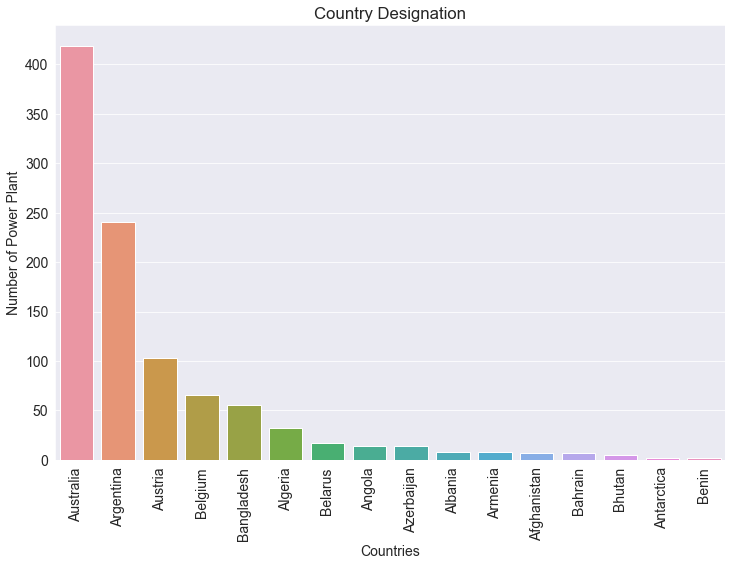

In [32]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

In [34]:
#Capacity of generating power in the top 20 countries.
#Using groupby() method we can split the datafram into country name and their capacity of generating power.
countries_capacity = global_power_plant_df.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity

,capacity_mw
country_long,
Australia,66193.790
Argentina,32400.579
Algeria,15203.000
Belgium,13288.600
Bangladesh,11807.000
Austria,11227.100
Belarus,8302.000
Bahrain,7581.300
Azerbaijan,5764.000


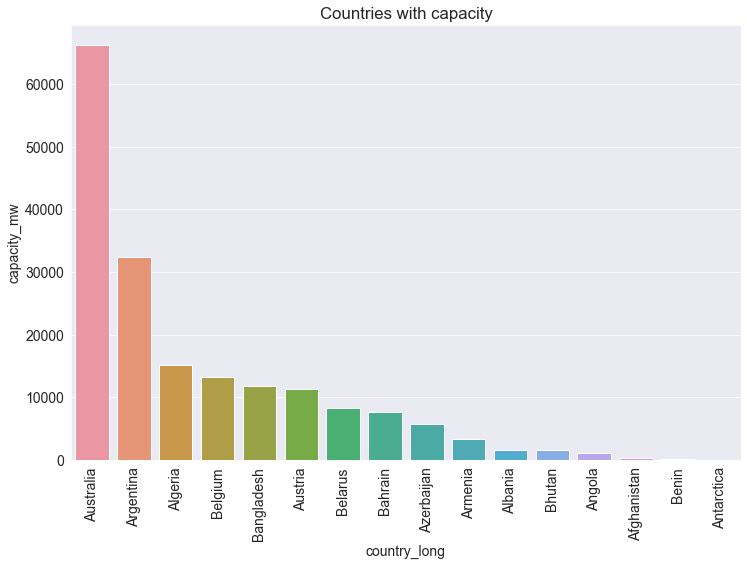

In [35]:
sns.barplot(x = countries_capacity.index, y = countries_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Countries with capacity');

In [36]:
global_power_plant_df.generation_gwh_2013.isna().sum()

1000

# Generation of power in USA, India and Australia during 2013, 2014, 2015, 2015, 2016


In [37]:
est_gen_2013 = global_power_plant_df.groupby('country_long')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False).head(10)
est_gen_2013_UIA = est_gen_2013[est_gen_2013.index.isin(['United States of America', 'India', 'Australia'])]

In [38]:
est_gen_2014 = global_power_plant_df.groupby('country_long')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False).head(10)
est_gen_2014_UIA = est_gen_2014[est_gen_2014.index.isin(['United States of America', 'India', 'Australia'])]

In [39]:
est_gen_2015 = global_power_plant_df.groupby('country_long')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False).head(20)
est_gen_2015_UIA = est_gen_2015[est_gen_2015.index.isin(['United States of America', 'India', 'Australia'])]

In [40]:
est_gen_2016 = global_power_plant_df.groupby('country_long')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False).head(20)
est_gen_2016_UIA = est_gen_2016[est_gen_2016.index.isin(['United States of America', 'India', 'Australia'])]